In [1]:
# Import all library.

import ROOT
import numpy as np
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"

ok!


In [2]:

#processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
processes = "lvbb125"
output = "/home/micael/MyWorkspace/DATA"

data_path = "/home/micael/MyWorkspace/DATA"

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

# Use Colors
list_color = []
list_color.append(ROOT.kBlue) # For truth
list_color.append(ROOT.kRed) 
#list_color.append(ROOT.kGreen)
#list_color.append(ROOT.kRed+2)
#list_color.append(ROOT.kRed+3)
#list_color.append(ROOT.kRed+4)
#end list of colors

#  Make a list of mass histogram
list_inf_M = []

hist_inf = HistogramFunctions.OneDimHistInfo("Truth Mass ","h_lvbb_M_truth",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)
hist_inf = HistogramFunctions.OneDimHistInfo("Reco Mass ","h_lvbb_M_reco",bins,m_min,m_max,"Invariant Mass",ylabel)
list_inf_M.append(hist_inf)

list_hist_M = HistogramFunctions.CreateListOf1DHistograms(list_inf_M,list_color)

c = rootnotes.canvas("c", (800, 600))



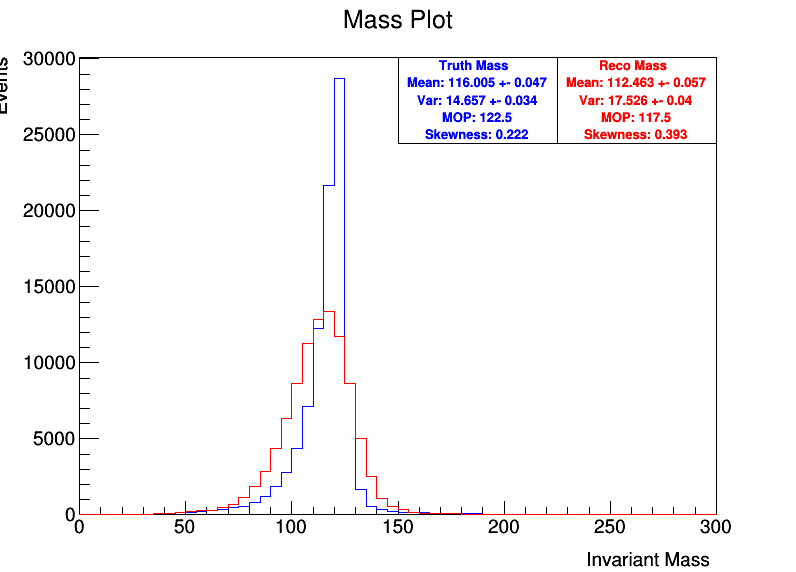

In [5]:
for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()
    #nrEvents = 10
    
    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
            # ==== Trtuh ======== #  
            j1Truth_LV = ROOT.TLorentzVector()
            j2Truth_LV = ROOT.TLorentzVector()
        
            j1Truth_pt = tree.j1_GENWZ_Pt
            j1Truth_phi = tree.j1_GENWZ_Phi
            j1Truth_eta = tree.j1_GENWZ_Eta
            j1Truth_e = tree.j1_GENWZ_E
            
            j2Truth_pt = tree.j2_GENWZ_Pt
            j2Truth_phi = tree.j2_GENWZ_Phi
            j2Truth_eta = tree.j2_GENWZ_Eta
            j2Truth_e = tree.j2_GENWZ_E
            
            j1Truth_LV.SetPtEtaPhiE(j1Truth_pt,j1Truth_eta,j1Truth_phi,j1Truth_e)
            j2Truth_LV.SetPtEtaPhiE(j2Truth_pt,j2Truth_eta,j2Truth_phi,j2Truth_e)
            
            dijetTruth_LV = j1Truth_LV + j2Truth_LV
            MassTruth = dijetTruth_LV.M()
            
            #====== Reco =========
            j1_LV = ROOT.TLorentzVector()
            j2_LV = ROOT.TLorentzVector()
        
            j1_pt = tree.j1_EMJESGSCMu_Pt
            j1_phi = tree.j1_EMJESGSCMu_Phi
            j1_eta = tree.j1_EMJESGSCMu_Eta
            j1_e = tree.j1_EMJESGSCMu_E
            
            j2_pt = tree.j2_EMJESGSCMu_Pt
            j2_phi = tree.j2_EMJESGSCMu_Phi
            j2_eta = tree.j2_EMJESGSCMu_Eta
            j2_e = tree.j2_EMJESGSCMu_E
            
            j1_LV.SetPtEtaPhiE(j1_pt,j1_eta,j1_phi,j1_e)
            j2_LV.SetPtEtaPhiE(j2_pt,j2_eta,j2_phi,j2_e)
            
            dijet_LV = j1_LV + j2_LV
            Mass = dijet_LV.M()
            
            list_hist_M[0].Fill(MassTruth)
            list_hist_M[1].Fill(Mass)

clone_list_M = []
for hist in list_hist_M:
    newhist = hist.Clone()
    clone_list_M.append(newhist)
HistogramFunctions.Draw1DHists(list_hist_M,output)
HistogramFunctions.DrawList1DHistInCanvas(clone_list_M, "Mass Plot", " Invariant Mass ", "Events", c)        

c

In [ ]:
HistogramFunctions.Draw1DHistInCanvas(list_hist_M,0,c)

In [ ]:
c